In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
IMAGE_SIZE=(64, 64)
BATCH_SIZE=32
NUM_CLASSES=33
DATA_PATH="AMHCD_64/AMHCD_64"
EPOCHS=20

In [3]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [4]:
train_gen = datagen.flow_from_directory(
    DATA_PATH,
    target_size=IMAGE_SIZE,
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

Found 20592 images belonging to 33 classes.


In [5]:
val_gen = datagen.flow_from_directory(
    DATA_PATH,
    target_size=IMAGE_SIZE,
    color_mode='grayscale',
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 5148 images belonging to 33 classes.


In [6]:
model = Sequential([
    Input(shape=(64, 64, 1)),
    Conv2D(6, kernel_size=5, activation='relu', padding='same'),
    AveragePooling2D(pool_size=2),
    Conv2D(16, kernel_size=5, activation='relu'),
    AveragePooling2D(pool_size=2),
    Flatten(),
    Dense(120, activation='relu'),
    Dropout(0.3),
    Dense(84, activation='relu'),
    Dropout(0.3),
    Dense(NUM_CLASSES, activation='softmax')
])

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

C:\Users\kharmouch\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 84s 124ms/step - accuracy: 0.2050 - loss: 2.8396 - val_accuracy: 0.7632 - val_loss: 0.8448
Epoch 2/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 73s 114ms/step - accuracy: 0.6814 - loss: 1.0603 - val_accuracy: 0.8535 - val_loss: 0.5265
Epoch 3/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 84s 131ms/step - accuracy: 0.7618 - loss: 0.7780 - val_accuracy: 0.8951 - val_loss: 0.3793
Epoch 4/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 79s 123ms/step - accuracy: 0.8139 - loss: 0.6214 - val_accuracy: 0.9079 - val_loss: 0.3161
Epoch 5/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 81s 126ms/step - accuracy: 0.8378 - loss: 0.5337 - val_accuracy: 0.9182 - val_loss: 0.2728
Epoch 6/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 75s 116ms/step - accuracy: 0.8628 - loss: 0.4513 - val_accuracy: 0.9347 - val_loss: 0.2334
Epoch 7/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 76s 117ms/step - accuracy: 0.8697 - loss: 0.4063 - val_accuracy: 0.9262 - val_loss: 0.2210
Epoch 8/20
644/644 ━━━━━━━━━━━━━━━━━━━━ 77s 119ms/step - accuracy: 0.8822 - loss: 0

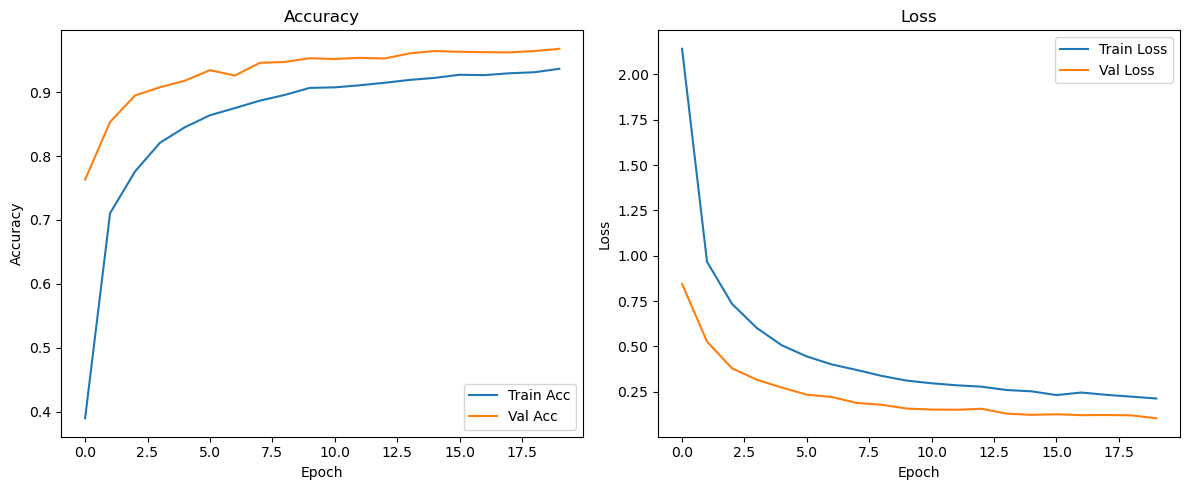

161/161 ━━━━━━━━━━━━━━━━━━━━ 17s 104ms/step


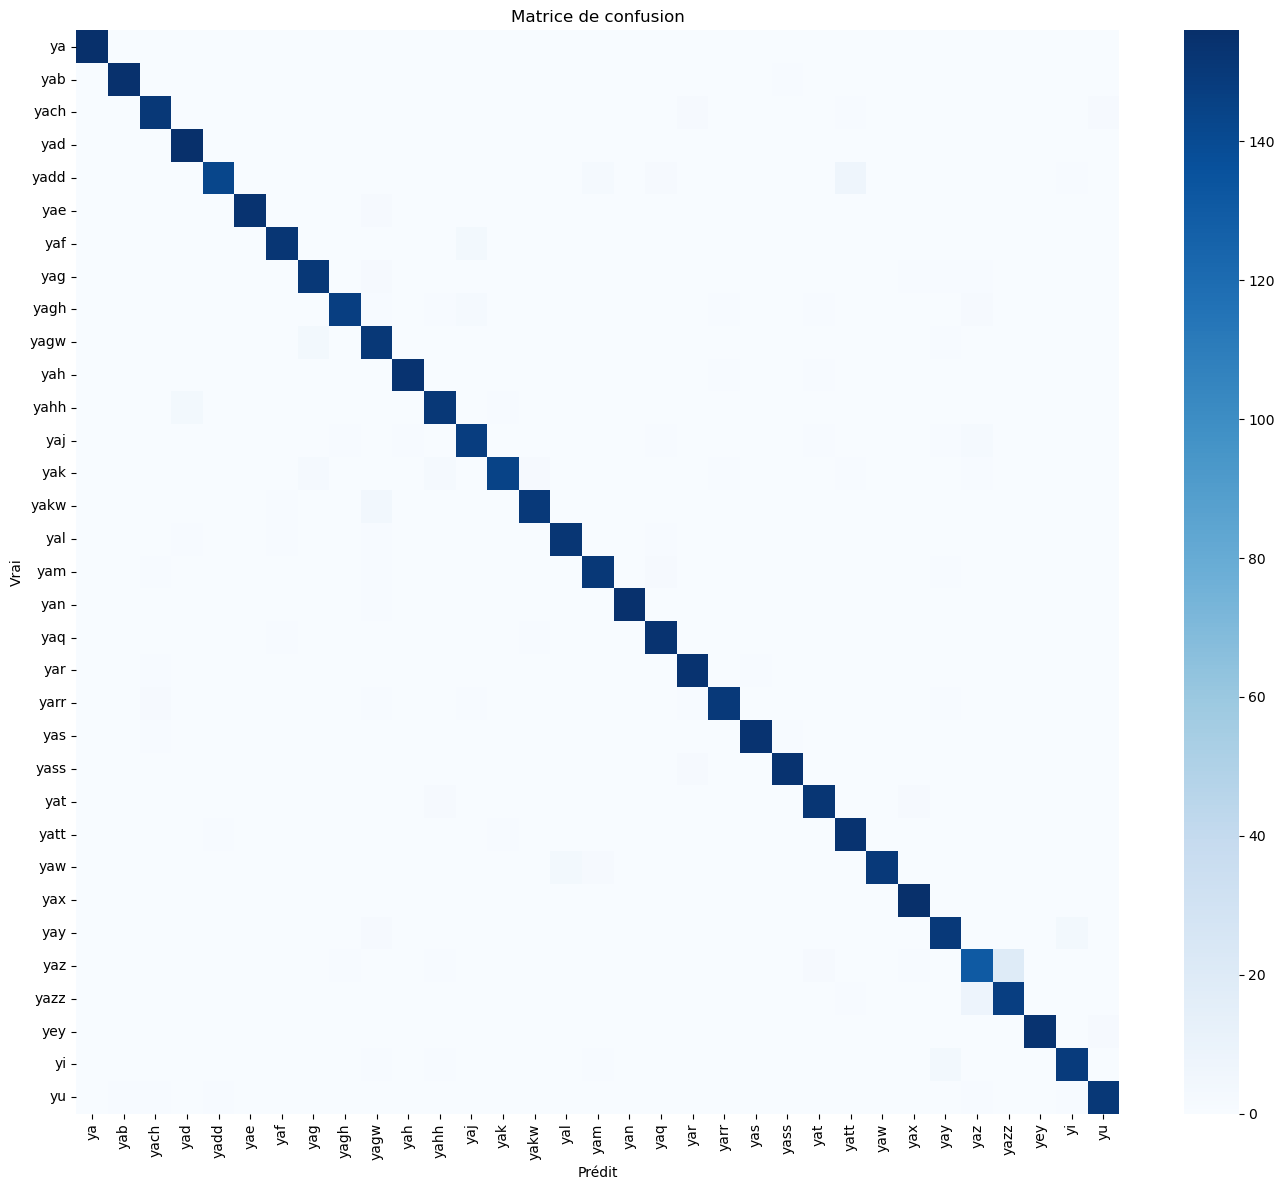

In [8]:
model.save("lenet5_tifinagh_33classes.h5")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.show()
val_gen.reset()
pred = model.predict(val_gen)
y_pred = np.argmax(pred, axis=1)
y_true = val_gen.classes
class_labels = list(val_gen.class_indices.keys())
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=False, fmt="d", cmap="Blues",
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.title("Matrice de confusion")
plt.xlabel("Prédit")
plt.ylabel("Vrai")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [10]:
report = classification_report(y_true, y_pred, target_names=class_labels, digits=4)
print("Rapport de classification complet :")
print(report)

acc = accuracy_score(y_true, y_pred)
f1_macro = f1_score(y_true, y_pred, average='macro')
f1_micro = f1_score(y_true, y_pred, average='micro')
print(f" Accuracy: {acc:.4f}")
print(f" F1-score Macro: {f1_macro:.4f}")
print(f" F1-score Micro: {f1_micro:.4f}")

Rapport de classification complet :
              precision    recall  f1-score   support

          ya     1.0000    1.0000    1.0000       156
         yab     0.9936    0.9936    0.9936       156
        yach     0.9618    0.9679    0.9649       156
         yad     0.9689    1.0000    0.9842       156
        yadd     0.9862    0.9167    0.9502       156
         yae     1.0000    0.9872    0.9935       156
         yaf     0.9806    0.9744    0.9775       156
         yag     0.9557    0.9679    0.9618       156
        yagh     0.9866    0.9423    0.9639       156
        yagw     0.8988    0.9679    0.9321       156
         yah     0.9935    0.9872    0.9904       156
        yahh     0.9497    0.9679    0.9587       156
         yaj     0.9487    0.9487    0.9487       156
         yak     0.9864    0.9295    0.9571       156
        yakw     0.9804    0.9615    0.9709       156
         yal     0.9744    0.9744    0.9744       156
         yam     0.9618    0.9679    0.9649  

In [24]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk, ImageOps
import numpy as np
import tensorflow as tf
model = tf.keras.models.load_model("lenet5_tifinagh_33classes.h5")
class_names = sorted([
    "ya", "yab", "yach", "yad", "yadd", "yae", "yaf", "yag", "yagh", "yagw",
    "yah", "yahh", "yaj", "yak", "yakw", "yal", "yam", "yan", "yaq", "yar",
    "yas", "yat", "yaw", "yax", "yay", "yaz", "yazh", "yazh3", "yazw", "yazz",
    "yazzh", "yazzw", "yazzx"
])
def predict_image(img_path):
    img = Image.open(img_path).convert("L")
    img = ImageOps.invert(img)
    img = img.resize((64, 64))
    img_array = np.array(img).reshape(1, 64, 64, 1) / 255.0
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    return class_names[predicted_class]
class App:
    def __init__(self, master):
        self.master = master
        master.title("Prédiction Tifinagh avec LeNet-5")
        self.label = tk.Label(master, text="Aucune image chargée.")
        self.label.pack()
        self.image_label = tk.Label(master)
        self.image_label.pack()
        self.predict_button = tk.Button(master, text="Choisir une image", command=self.load_image)
        self.predict_button.pack()
        self.result_label = tk.Label(master, text="", font=("Arial", 16))
        self.result_label.pack(pady=10)
    def load_image(self):
        file_path = filedialog.askopenfilename()
        if file_path:
            img = Image.open(file_path)
            img.thumbnail((200, 200))
            photo = ImageTk.PhotoImage(img)
            self.image_label.configure(image=photo)
            self.image_label.image = photo
            pred = predict_image(file_path)
            self.result_label.config(text=f"Classe prédite : {pred}")
root = tk.Tk()
app = App(root)
root.mainloop()